In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/IPL_ball_by_ball_updated till 2024.csv')

In [6]:
# Filter data for "R Ashwin"
ashwin_data = data[(data['Bowler'] == 'R Ashwin') | (data['Striker'] == 'R Ashwin')]

# Inspect the data
ashwin_data.head()

,Match id,Date,Season,Batting team,Bowling team,Innings No,Ball No,Bowler,Striker,Non Striker,runs_scored,extras,type of extras,score,score/wicket,wicket_confirmation,wicket_type,fielders_involved,Player Out
25729,392234,20-05-2009,2009,Chennai Super Kings,Kings XI Punjab,1.0,14.5,PP Chawla,R Ashwin,JDP Oram,0.0,0.0,NaN,96.0,96/6,0.0,NaN,NaN,NaN
25730,392234,20-05-2009,2009,Chennai Super Kings,Kings XI Punjab,1.0,15.0,PP Chawla,R Ashwin,JDP Oram,0.0,0.0,NaN,96.0,96/6,0.0,NaN,NaN,NaN
25732,392234,20-05-2009,2009,Chennai Super Kings,Kings XI Punjab,1.0,15.2,WA Mota,R Ashwin,JDP Oram,0.0,0.0,NaN,97.0,97/6,0.0,NaN,NaN,NaN
25733,392234,20-05-2009,2009,Chennai Super Kings,Kings XI Punjab,1.0,15.3,WA Mota,R Ashwin,JDP Oram,0.0,0.0,NaN,97.0,97/6,0.0,NaN,NaN,NaN
25734,392234,20-05-2009,2009,Chennai Super Kings,Kings XI Punjab,1.0,15.4,WA Mota,R Ashwin,JDP Oram,1.0,0.0,NaN,98.0,98/6,0.0,NaN,NaN,NaN


In [10]:
# Filter data for wickets taken by "R Ashwin"
wickets_data = ashwin_data[ashwin_data['Player Out'].notnull() & (ashwin_data['Bowler'] == 'R Ashwin')]

# Calculate the number of wickets taken per match
wickets_per_match = wickets_data.groupby('Match id').size()

In [18]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson
import numpy as np

In [19]:
# Calculate the mean (lambda) for the Poisson distribution
lambda_estimate = np.mean(wickets_per_match)

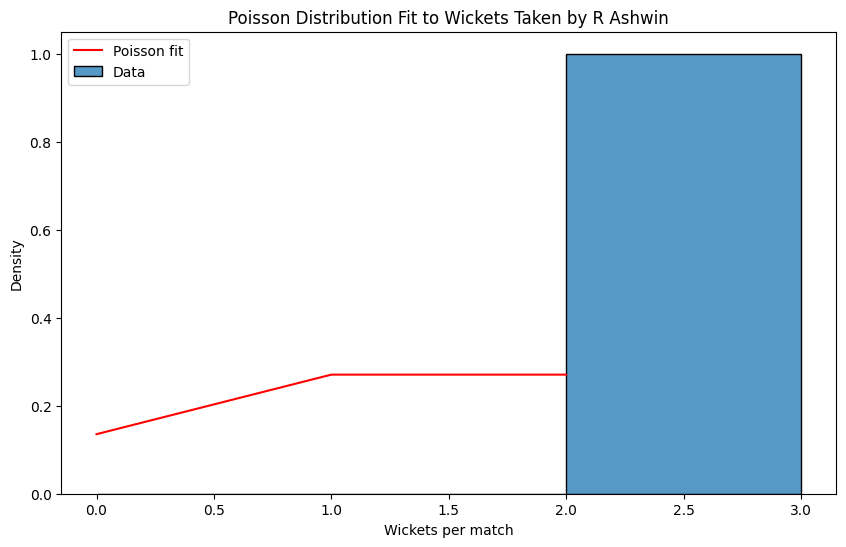

In [21]:
# Plot the data and the fitted distribution
plt.figure(figsize=(10, 6))
sns.histplot(wickets_per_match, bins=range(0, max(wickets_per_match)+2), kde=False, stat="density", label='Data')
x = range(0, max(wickets_per_match)+1)
plt.plot(x, stats.poisson.pmf(x, lambda_estimate), 'r-', label='Poisson fit')
plt.xlabel('Wickets per match')
plt.ylabel('Density')
plt.title('Poisson Distribution Fit to Wickets Taken by R Ashwin')
plt.legend()
plt.show()